In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.4 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

train_df = pd.read_csv('/content/drive/MyDrive/movies_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/movies_test.csv')
submission = pd.read_csv('/content/drive/MyDrive/submission.csv')

dataset = pd.concat([train_df, test_df], axis = 0).reset_index().drop('index', axis = 1)
dataset

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398.0
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501.0
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083.0
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866.0
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387.0
...,...,...,...,...,...,...,...,...,...,...,...,...
838,해에게서 소년에게,디씨드,드라마,2015-11-19,78,15세 관람가,안슬기,2590.00,1,4,4,NaN
839,울보 권투부,인디스토리,다큐멘터리,2015-10-29,86,12세 관람가,이일하,NaN,0,18,2,NaN
840,어떤살인,(주)컨텐츠온미디어,느와르,2015-10-28,107,청소년 관람불가,안용훈,NaN,0,224,4,NaN
841,말하지 못한 비밀,(주)씨타마운틴픽쳐스,드라마,2015-10-22,102,청소년 관람불가,송동윤,50699.00,1,68,7,NaN


In [ ]:
plt.rc('font', family='NanumBarunGothic') 


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


In [ ]:
train_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
train_df[train_df['dir_prev_bfnum'].isnull()]['dir_prev_num'].value_counts()


0    330
Name: dir_prev_num, dtype: int64

In [ ]:
test_df[test_df['dir_prev_bfnum'].isnull()]['dir_prev_num'].value_counts()

0    136
Name: dir_prev_num, dtype: int64

In [ ]:
dataset.fillna(0, inplace = True)

In [ ]:
train_df.fillna(0, inplace = True)
test_df.fillna(0, inplace = True)

In [ ]:
train_df['title'].nunique()

600

In [ ]:
def draw_plot(column, data):
    sns.countplot(y = column, data = data, order = data[column].value_counts().iloc[:10].index)

In [ ]:
def draw_kdeplot(column, data):
    sns.kdeplot(x = data[column])

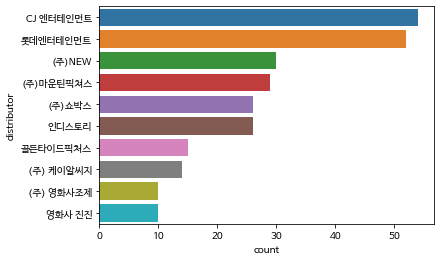

In [ ]:
draw_plot('distributor', train_df)

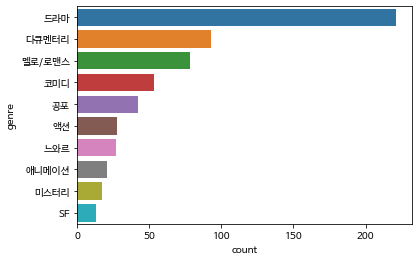

In [ ]:
draw_plot('genre', train_df)

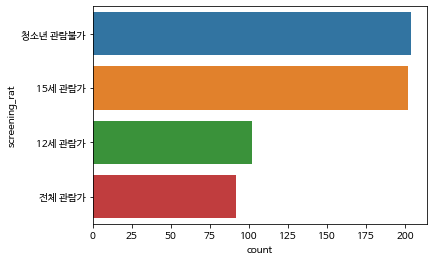

In [ ]:
draw_plot('screening_rat', train_df)

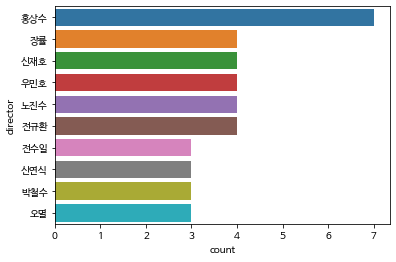

In [ ]:
draw_plot('director', train_df)

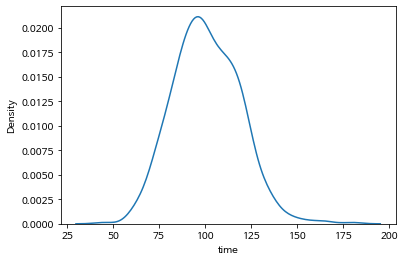

In [ ]:
draw_kdeplot('time', train_df)

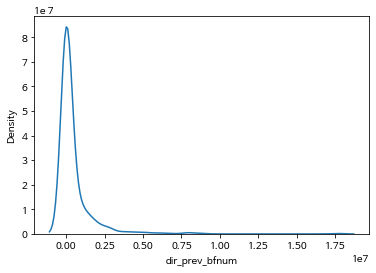

In [ ]:
draw_kdeplot('dir_prev_bfnum', train_df)

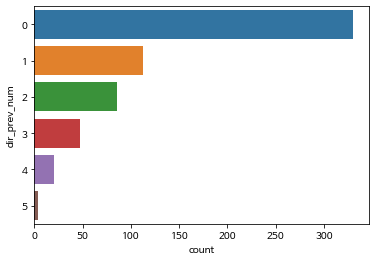

In [ ]:
draw_plot('dir_prev_num', train_df)

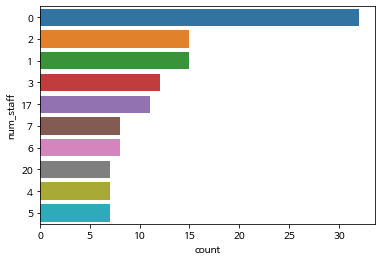

In [ ]:
draw_plot('num_staff', train_df)

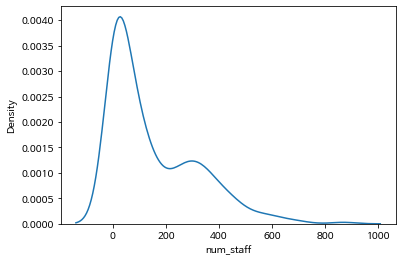

In [ ]:
draw_kdeplot('num_staff', train_df)

In [ ]:
train_df.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,6.000000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,4.726993e+05,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.309474e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,0.000000e+00,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,0.000000e+00,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,3.761416e+05,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


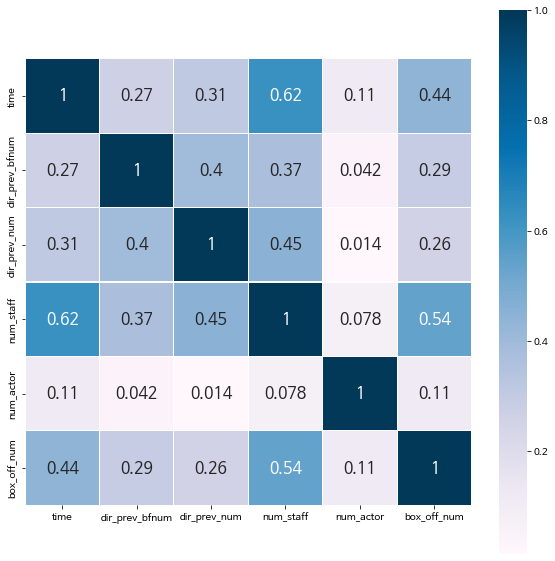

In [ ]:
colormap = plt.cm.PuBu

plt.figure(figsize = (10, 10))
numeric_columns = ['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor',
       'box_off_num']
sns.heatmap(train_df[numeric_columns].astype(float).corr(),linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

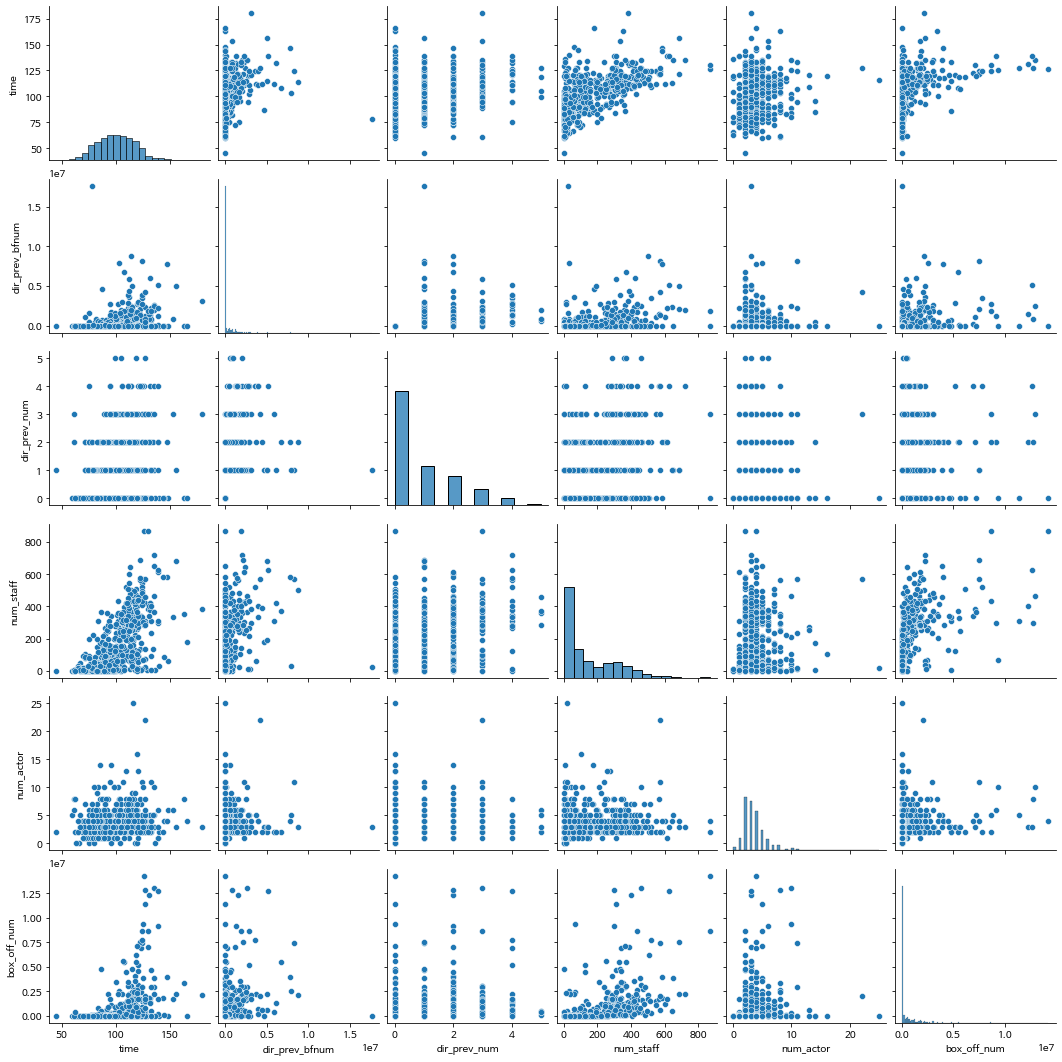

In [ ]:
sns.pairplot(train_df[numeric_columns])

In [ ]:
train_df[numeric_columns].astype(float).corr()['box_off_num']

time              0.441452
dir_prev_bfnum    0.293791
dir_prev_num      0.259674
num_staff         0.544265
num_actor         0.111179
box_off_num       1.000000
Name: box_off_num, dtype: float64

In [ ]:
dataset.drop('title', axis = 1, inplace = True)

In [ ]:
train_df.drop('title', axis= 1, inplace = True)
test_df.drop('title', axis = 1, inplace = True)

In [ ]:
train_df

,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398
1,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...
595,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,0.00,0,123,4,2475
598,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,0.00,0,431,4,2192525


In [ ]:
train_df.groupby('screening_rat')['box_off_num'].mean()

screening_rat
12세 관람가     8.449809e+05
15세 관람가     1.247519e+06
전체 관람가      1.351005e+05
청소년 관람불가    3.641813e+05
Name: box_off_num, dtype: float64

In [ ]:
train_df['year'] = train_df['release_time'].apply(lambda x : x[:4])
test_df['year'] = test_df['release_time'].apply(lambda x : x[:4])
train_df.groupby('year')['box_off_num'].mean()

year
2010    5.416582e+05
2011    6.288671e+05
2012    9.457252e+05
2013    1.007358e+06
2014    5.938845e+05
2015    5.958692e+05
Name: box_off_num, dtype: float64

In [ ]:
dataset['year'] = dataset['release_time'].apply(lambda x : x[:4])

In [ ]:
train_df.groupby('director')['box_off_num'].mean().sort_values(ascending = False)[:10]

director
윤제균    14262766.0
최동훈    12845252.0
양우석    11374879.0
봉준호     9350351.0
한재림     9135806.0
황동혁     8659725.0
이석훈     8212959.5
김한민     7482180.0
추창민     6986501.0
장철수     6959083.0
Name: box_off_num, dtype: float64

In [ ]:
train_df['distributor'].nunique(), train_df['genre'].nunique(), train_df['screening_rat'].nunique(), train_df['director'].nunique()

(169, 12, 4, 472)

In [ ]:
dataset['director'].nunique(), train_df['director'].nunique()

(614, 472)

In [ ]:
train_df.groupby('genre')['box_off_num'].mean()

genre
SF        1.788346e+06
공포        5.908325e+05
느와르       2.263695e+06
다큐멘터리     6.717226e+04
드라마       6.256898e+05
멜로/로맨스    4.259680e+05
뮤지컬       6.627000e+03
미스터리      5.275482e+05
서스펜스      8.261100e+04
애니메이션     1.819267e+05
액션        2.203974e+06
코미디       1.193914e+06
Name: box_off_num, dtype: float64

In [ ]:
dataset

,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year
0,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398.0,2012
1,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501.0,2015
2,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083.0,2013
3,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866.0,2012
4,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387.0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
838,디씨드,드라마,2015-11-19,78,15세 관람가,안슬기,2590.00,1,4,4,0.0,2015
839,인디스토리,다큐멘터리,2015-10-29,86,12세 관람가,이일하,0.00,0,18,2,0.0,2015
840,(주)컨텐츠온미디어,느와르,2015-10-28,107,청소년 관람불가,안용훈,0.00,0,224,4,0.0,2015
841,(주)씨타마운틴픽쳐스,드라마,2015-10-22,102,청소년 관람불가,송동윤,50699.00,1,68,7,0.0,2015


In [ ]:
from sklearn.preprocessing import OneHotEncoder

dataset['encode_target_genre'] = dataset['genre'].apply(lambda x : train_df.groupby('genre')['box_off_num'].mean()[x])
dataset['encode_target_year'] = dataset['year'].apply(lambda x : train_df.groupby('year')['box_off_num'].mean()[x])

Onehot_encoder = OneHotEncoder(sparse = False)
onehot = Onehot_encoder.fit_transform(dataset[['screening_rat']])
onehot_encoded = pd.DataFrame(onehot, columns = Onehot_encoder.categories_)

data = pd.concat([dataset.drop(['distributor', 'genre', 'year', 'director', 'screening_rat', 'release_time'], axis = 1), onehot_encoded], axis = 1)

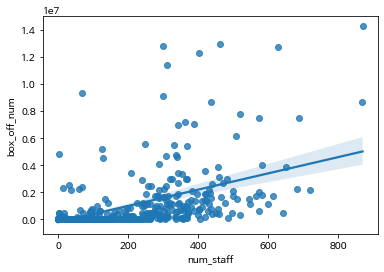

In [ ]:
sns.regplot(x = train_data['num_staff'], y = train_data['box_off_num'])

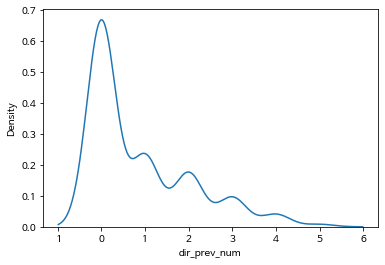

In [ ]:
draw_kdeplot('dir_prev_num', train_data)

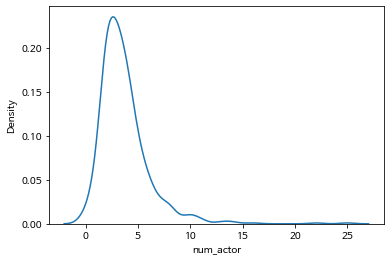

In [ ]:
draw_kdeplot('num_actor', train_data)

In [ ]:
data2 = data.copy()
data2

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,encode_target_genre,encode_target_year,"(12세 관람가,)","(15세 관람가,)","(전체 관람가,)","(청소년 관람불가,)"
0,96,0.00,0,91,2,23398.0,2.203974e+06,9.457252e+05,0.0,0.0,0.0,1.0
1,130,1161602.50,2,387,3,7072501.0,2.263695e+06,5.958692e+05,0.0,0.0,0.0,1.0
2,123,220775.25,4,343,4,6959083.0,2.203974e+06,1.007358e+06,0.0,1.0,0.0,0.0
3,101,23894.00,2,20,6,217866.0,1.193914e+06,9.457252e+05,0.0,0.0,1.0,0.0
4,108,1.00,1,251,2,483387.0,1.193914e+06,5.416582e+05,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
838,78,2590.00,1,4,4,0.0,6.256898e+05,5.958692e+05,0.0,1.0,0.0,0.0
839,86,0.00,0,18,2,0.0,6.717226e+04,5.958692e+05,1.0,0.0,0.0,0.0
840,107,0.00,0,224,4,0.0,2.263695e+06,5.958692e+05,0.0,0.0,0.0,1.0
841,102,50699.00,1,68,7,0.0,6.256898e+05,5.958692e+05,0.0,0.0,0.0,1.0


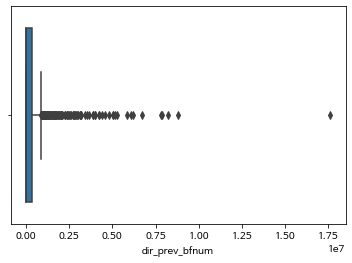

In [ ]:
from sklearn.preprocessing import RobustScaler
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler

skew_columns = ['dir_prev_bfnum', 'num_actor']
minmax_columns = ['encode_target_genre', 'encode_target_year', 'num_staff', 'time', 'dir_prev_num']

robustscaler= RobustScaler()
robustscaler.fit(data[skew_columns])
robust_scaled_df = pd.DataFrame(robustscaler.transform(data[skew_columns]), columns = skew_columns)
'''for column in skew_columns:
    print('boxcox 적용하기 전' + column +'의 skewness : ', skew(data[column]))
    data2[column] = boxcox(data[column] + 1)[0]
    print('boxcox 적용한 후' + column + '의 skewness : ', skew(data2[column]))'''

scaler = MinMaxScaler()
scaler.fit(data[minmax_columns])
data_scaled_df = pd.DataFrame(scaler.transform(data[minmax_columns]), columns = minmax_columns)

sns.boxplot(x = data['dir_prev_bfnum'])

In [ ]:
data_all = pd.concat([data2.drop(minmax_columns, axis = 1), data_scaled_df], axis = 1)
X = data_all.drop('box_off_num', axis = 1)
y = data_all['box_off_num']

X.shape, y.shape

((843, 11), (843,), (843, 12))

In [ ]:
X_train, X_test, y_train = X[:600], X[600:], y[:600]

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [ ]:
#Validation function
n_folds = 10

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [ ]:
lasso = Lasso(alpha = 0.0005)
ENet = ElasticNet(alpha = 0.0005, l1_ratio = .9)
KRR = KernelRidge(alpha = 0.5, kernel = 'polynomial', degree = 2, coef0 = 2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [ ]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 1441167.8578 (442504.4136)



In [ ]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 1442976.1994 (442399.3446)



In [ ]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 1448235.0739 (412590.5018)



In [ ]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 1506250.2511 (494037.0062)



In [ ]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 1624499.8027 (445808.7155)



In [ ]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 1497640.6792 (369035.0716)



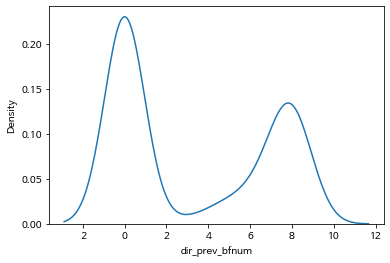

In [ ]:
sns.kdeplot(data2['dir_prev_bfnum'])

In [ ]:
train_df.groupby('year')['box_off_num'].mean(), train_df.groupby('genre')['box_off_num'].mean()

(year
 2010    5.416582e+05
 2011    6.288671e+05
 2012    9.457252e+05
 2013    1.007358e+06
 2014    5.938845e+05
 2015    5.958692e+05
 Name: box_off_num, dtype: float64, genre
 SF        1.788346e+06
 공포        5.908325e+05
 느와르       2.263695e+06
 다큐멘터리     6.717226e+04
 드라마       6.256898e+05
 멜로/로맨스    4.259680e+05
 뮤지컬       6.627000e+03
 미스터리      5.275482e+05
 서스펜스      8.261100e+04
 애니메이션     1.819267e+05
 액션        2.203974e+06
 코미디       1.193914e+06
 Name: box_off_num, dtype: float64)

In [ ]:
model_lgb.fit(X_train, y_train)
predict= model_lgb.predict(X_test)

submission['box_off_num'] = predict
submission

,title,box_off_num
0,용서는 없다,3.581483e+06
1,아빠가 여자를 좋아해,4.328452e+05
2,하모니,-3.007250e+05
3,의형제,1.906439e+06
4,평행 이론,4.322443e+05
...,...,...
238,해에게서 소년에게,-3.001438e+05
239,울보 권투부,-1.289658e+05
240,어떤살인,6.003786e+05
241,말하지 못한 비밀,-5.382710e+05


In [445]:
submission.to_csv('/content/drive/MyDrive/submission.csv', index = False)

In [ ]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [ ]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

KeyboardInterrupt: ignored

In [ ]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [ ]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

In [ ]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

In [ ]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

In [ ]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

In [ ]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

In [ ]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [ ]:
submission['box_off_num'] = ensemble
sub.to_csv('submission.csv',index=False)